In [1]:
from google.colab import files
uploaded = files.upload()

In [0]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
import tensorflow as tf
from tensorflow.python.framework import ops

In [0]:
dataset = h5py.File("train_signs.h5", 'r+')

In [0]:
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y


In [0]:
def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (1, number of examples)
    mini_batch_size -- size of the mini-batches, integer
    
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """
    
    np.random.seed(seed)            # To make your "random" minibatches the same as ours
    m = X.shape[1]                  # number of training examples
    mini_batches = []
    n = Y.shape[1]    
 
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    permutationy = list(np.random.permutation(6))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:,permutationy].reshape((1,m))

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        ### START CODE HERE ### (approx. 2 lines)
        mini_batch_X = shuffled_X[:, k * mini_batch_size : (k + 1) * mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k * mini_batch_size : (k + 1) * mini_batch_size]
        ### END CODE HERE ###
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        ### START CODE HERE ### (approx. 2 lines)
        mini_batch_X = shuffled_X[:, num_complete_minibatches * mini_batch_size:]
        mini_batch_Y = shuffled_Y[:, num_complete_minibatches * mini_batch_size:]
        ### END CODE HERE ###
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches


In [6]:
print(dataset)

<HDF5 file "train_signs.h5" (mode r+)>


In [7]:
list(dataset.keys())

['list_classes', 'train_set_x', 'train_set_y']

In [0]:
train_data_x = np.array(dataset["train_set_x"][:]) # your train set features
train_data_y = np.array(dataset["train_set_y"][:]) # your train set labels
train_data_classes = dataset['list_classes']

In [9]:

print(train_data_y[0])

5


In [10]:
print(train_data_x.shape)
print(train_data_y.shape)

(1080, 64, 64, 3)
(1080,)


In [0]:
x_train = np.divide(train_data_x,255)
y_train = convert_to_one_hot(train_data_y, 6).T


In [12]:
print(train_data_x[1])
print("   ")
print(x_train[1])

[[[238 232 223]
  [238 232 223]
  [238 232 223]
  ...
  [222 216 209]
  [221 216 207]
  [221 216 206]]

 [[237 232 223]
  [238 232 223]
  [238 232 223]
  ...
  [222 216 209]
  [222 216 208]
  [223 217 207]]

 [[236 232 222]
  [237 232 223]
  [238 232 223]
  ...
  [222 216 209]
  [222 216 208]
  [221 216 207]]

 ...

 [[218 212 204]
  [217 212 204]
  [217 211 205]
  ...
  [214 203 194]
  [214 203 195]
  [214 204 194]]

 [[217 211 203]
  [217 211 203]
  [216 210 203]
  ...
  [214 203 194]
  [215 203 194]
  [215 204 193]]

 [[216 210 202]
  [216 210 203]
  [215 209 203]
  ...
  [214 203 194]
  [215 203 194]
  [215 204 192]]]
   
[[[0.93333333 0.90980392 0.8745098 ]
  [0.93333333 0.90980392 0.8745098 ]
  [0.93333333 0.90980392 0.8745098 ]
  ...
  [0.87058824 0.84705882 0.81960784]
  [0.86666667 0.84705882 0.81176471]
  [0.86666667 0.84705882 0.80784314]]

 [[0.92941176 0.90980392 0.8745098 ]
  [0.93333333 0.90980392 0.8745098 ]
  [0.93333333 0.90980392 0.8745098 ]
  ...
  [0.87058824 0.847

In [13]:
print(x_train.shape)

(1080, 64, 64, 3)


In [14]:
print(y_train.shape)

(1080, 6)


In [0]:
def make_placeholder(h,w,c,y):
  X = tf.placeholder(tf.float32, shape=[1080,h,w,c])
  Y = tf.placeholder(tf.float32,shape=[1080,y])
  return X,Y

In [0]:
X,Y = make_placeholder(64,64,3,6)

In [17]:
print (str(X)+"  "+ str(Y))

Tensor("Placeholder:0", shape=(1080, 64, 64, 3), dtype=float32)  Tensor("Placeholder_1:0", shape=(1080, 6), dtype=float32)


In [0]:
def initialize_parameters():
  tf.set_random_seed(1)
  W1 = tf.get_variable('W1', [4,4,3,8], initializer = tf.contrib.layers.xavier_initializer(seed=0))
  W2 = tf.get_variable('W2', [2,2,8,16], initializer = tf.contrib.layers.xavier_initializer(seed=0))
  parameters= {"W1":W1,
               "W2": W2
      
  }
  return parameters

In [19]:
tf.reset_default_graph()
with tf.Session() as tf_sess:
  parameters = initialize_parameters()
  init = tf.global_variables_initializer()
  tf_sess.run(init)
  print("W1 = " + str(parameters["W1"].eval()[1,1,1,1]))
  print("W2 = " + str(parameters["W2"].eval()[1,1,1,1]))


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Colocations handled automatically by placer.
W1 = 0.1417614
W2 = 0.17750949


In [20]:
tf.reset_default_graph()
with tf.Session() as sess_test:
    parameters = initialize_parameters()
    init = tf.global_variables_initializer()
    sess_test.run(init)
    print("W1 = " + str(parameters["W1"].eval()))
    print("W2 = " + str(parameters["W2"].eval()))

W1 = [[[[ 0.11547081 -0.15562162  0.14463945 -0.12213563 -0.161331
     0.0167321   0.00137798  0.15687598]
   [ 0.06261188  0.15809353 -0.13944083  0.1304368   0.14947264
     0.07770665 -0.0344099   0.02789916]
   [ 0.1310067   0.03547595  0.1019934   0.17467071 -0.16157703
    -0.06069881 -0.10278072 -0.06633689]]

  [[-0.1701455  -0.15981087 -0.06383926 -0.00349012 -0.14234345
    -0.05761932  0.00821769 -0.07173218]
   [ 0.14097519  0.11141728  0.18437327  0.0588678  -0.13764857
    -0.11404216  0.05882488  0.09655331]
   [ 0.09364428 -0.03100704  0.16560768  0.14417745  0.15409656
    -0.08602516 -0.12028332 -0.16772161]]

  [[ 0.18019755 -0.17030357 -0.10018802 -0.18330556  0.03716455
    -0.09169444 -0.01606575 -0.10697315]
   [-0.1352132   0.04067522  0.07451691  0.02565144 -0.08935398
    -0.14955646  0.17125843 -0.10636543]
   [ 0.1641133  -0.16645104  0.14331098 -0.0984499  -0.02071032
    -0.13608913  0.15722917 -0.05736801]]

  [[ 0.18048044  0.12755601  0.09927674 -0.078

In [0]:
def forward_propagation(X, parameters):
  W1 = parameters["W1"]
  W2 = parameters["W2"]
  z1 = tf.nn.conv2d(X,W1,strides = [1,1,1,1], padding = 'SAME')
  a1 = tf.nn.relu(z1)
  p1 = tf.nn.max_pool(a1,ksize = [1,8,8,1], strides = [1,8,8,1], padding = 'SAME'  )
  z2 = tf.nn.conv2d(p1,W2,strides = [1,1,1,1], padding = 'SAME')
  a2 = tf.nn.relu(z2)
  p2 = tf.nn.max_pool(a2,ksize = [1,4,4,1], strides = [1,4,4,1], padding = 'SAME'  )
  output = tf.contrib.layers.flatten(p2)
  z3 = tf.contrib.layers.fully_connected(output,6,activation_fn = None)
  return z3
  

In [0]:
def compute_cost(z3,Y):
  cost = tf.nn.softmax_cross_entropy_with_logits(logits = z3, labels = Y)
  cost = tf.reduce_mean(cost)
  return cost

In [0]:
def model(x_train,y_train, learning_rate = 0.01, num_epochs = 250, minibatch_size = 100, print_cost = True):
  ops.reset_default_graph()
  costs = []
  tf.set_random_seed(1)
  seed = 3
  (m,h,w,c) = x_train.shape
  y = y_train.shape[1]
  X,Y = make_placeholder(h,w,c,y)
  parameters = initialize_parameters()
  z3 = forward_propagation(X, parameters)
  cost = compute_cost(z3,Y)
  optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)
  init = tf.global_variables_initializer()
  with tf.Session() as sess:
    sess.run(init)
    for epoch in range(num_epochs):
      minibatch_cost = 0
      num_minibatches = int(m / minibatch_size)
      seed=seed+1
      rand_arrayx = np.random.rand(1080,64,64,3)
      rand_arrayy = np.random.rand(1080,6)
      _ , temp_cost = sess.run([optimizer, cost], feed_dict={X:x_train, Y:y_train})
                
                
      minibatch_cost += temp_cost / num_minibatches
      if print_cost == True and epoch % 1 == 0:
                   
        print ("Cost after epoch %i: %f" % (epoch, minibatch_cost))
      if print_cost == True and epoch % 1 == 0:
              
        costs.append(minibatch_cost)
          
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()  
    predictions = tf.argmax(z3,1)   
    correct_predictions = tf.equal(predictions, tf.argmax(Y,1))
    accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
    print(accuracy)
    train_accuracy = accuracy.eval({X:x_train, Y: y_train})
    print("Train Accuracy:", train_accuracy)
    saver.save(sess, "./model.ckpt")    
                
    return train_accuracy, parameters    
  

(1080, 6)
Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Cost after epoch 0: 0.184140
Cost after epoch 1: 0.179816
Cost after epoch 2: 0.180528
Cost after epoch 3: 0.179706
Cost after epoch 4: 0.179102
Cost after epoch 5: 0.178754
Cost after epoch 6: 0.178340
Cost after epoch 7: 0.178185
Cost after epoch 8: 0.178145
Cost after epoch 9: 0.177990
Cost after epoch 10: 0.177687
Cost after epoch 11: 0.177346
Cost after epoch 12: 0.176902
Cost after epoch 13: 0.176200
Cost after epoch 14: 0.175511
Cost after epoch 15: 0.175381
Cost after epoch 16: 0.174413
Cost after epoch 17: 0.173858
Cost after epoch 18: 0.172904
Cost after epoch 19: 0.171998
Cost after epoch 20: 0.170786
Cost after epoch 21: 0.170027
Cost after epoch 22: 0.168355
Cost after epoch 23: 0.167219
Cost after epoch 24: 0.16534

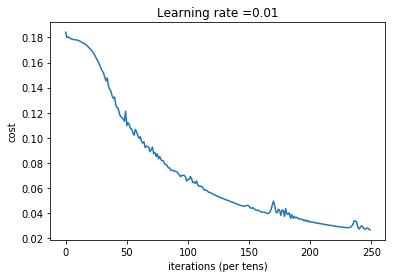

Tensor("Mean_1:0", shape=(), dtype=float32)
Train Accuracy: 0.9203704


In [24]:
print(y_train.shape)
_, parameters = model(x_train, y_train)


In [0]:
permutationy = list(np.random.permutation(6))

In [0]:
saver = tf.train.Saver()

NameError: ignored